# Proyecto #1
### Yosef Maldonado - 14003689

In [43]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# loading dataset
'''
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
OverallQual: Overall material and finish quality, rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
1stFlrSF: First Floor square feet
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
YearBuilt: Original construction date
LotFrontage: Linear feet of street connected to property
'''

dataset = np.load('./data/proyecto_training_data.npy')

In [38]:
# creating dataframe to label columns
column_labels = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df = pd.DataFrame(dataset, columns=column_labels)

In [39]:
# slicing dataset
df_rows = df.shape[0]
split_index = int(df_rows * 0.80)  # check where to split
df_training_set = df.iloc[:split_index] # 80% of the data
df_validation_and_test_set = df.iloc[split_index:] # 20% of the data

# Análisis exploratorio de datos (Training set)

In [40]:
# training (80% of dataset) analysis
# DataFrame.describe(): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe
# Transpose (T): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
df_training_statistics = df_training_set.describe().T 
df_training_statistics['range'] = df_training_statistics['max'] - df_training_statistics['min'] # range
df_training_statistics = df_training_statistics[['mean', 'max', 'min', 'range', 'std']]
df_training_statistics

,mean,max,min,range,std
SalePrice,180590.277397,755000.0,34900.0,720100.0,78815.697902
OverallQual,6.101027,10.0,1.0,9.0,1.378025
1stFlrSF,1156.323630,3228.0,334.0,2894.0,373.780374
TotRmsAbvGrd,6.485445,14.0,2.0,12.0,1.609141
YearBuilt,1971.451199,2010.0,1875.0,135.0,29.951707
LotFrontage,69.946985,313.0,21.0,292.0,23.478161


# Histograma de variable (Training set)

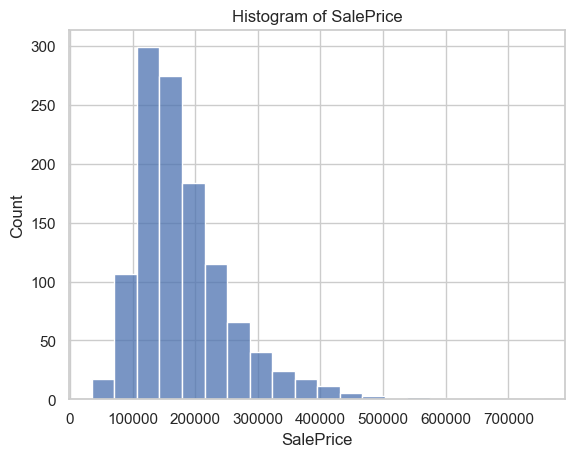

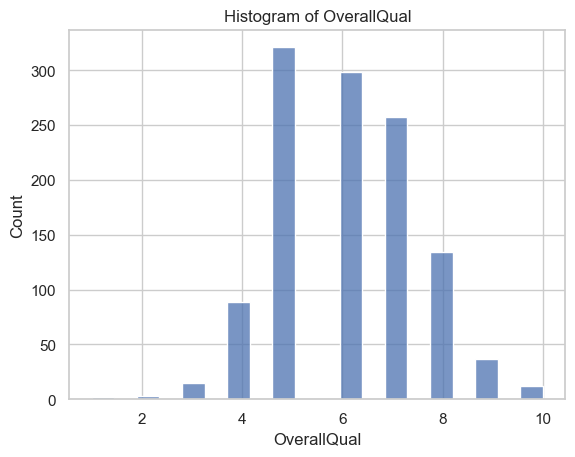

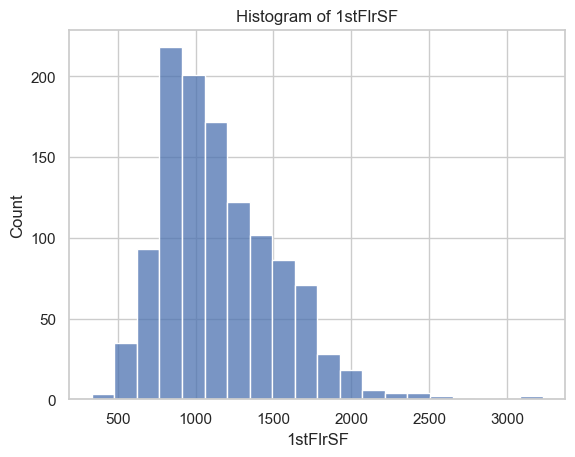

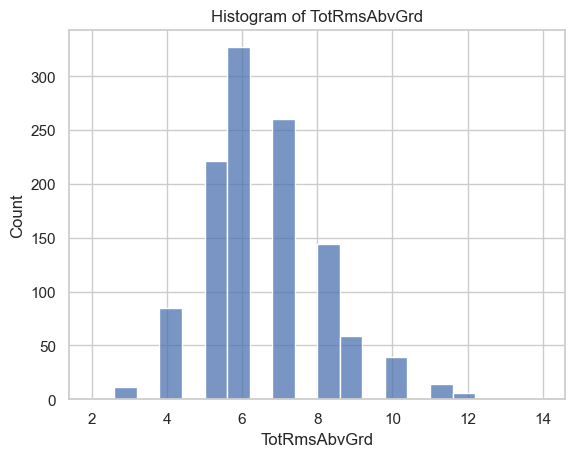

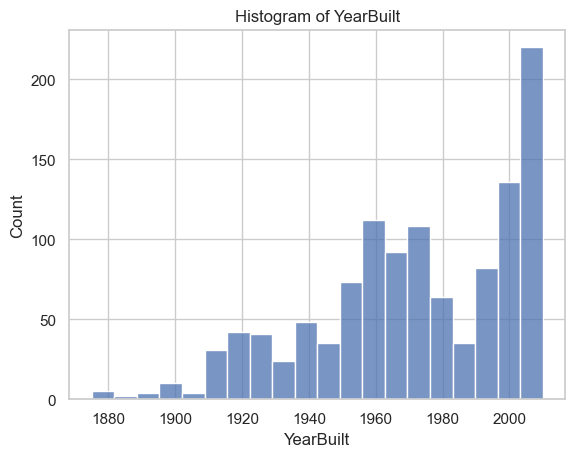

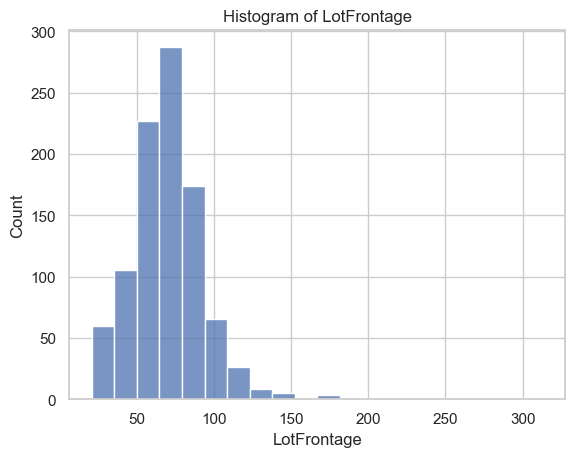

In [45]:
# distplot is deprecated: https://seaborn.pydata.org/generated/seaborn.distplot.html
# using histplot

sns.set(style='whitegrid')

for column in df_training_set.columns:
    sns.histplot(df_training_set[column].dropna(), kde=False, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


# Análisis exploratorio de datos (Validation and test set)

In [42]:
# validation and test (20% of dataset) analysis
# DataFrame.describe(): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe
# Transpose (T): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
df_validation_and_test_statistics = df_validation_and_test_set.describe().T 
df_validation_and_test_statistics['range'] = df_validation_and_test_statistics['max'] - df_validation_and_test_statistics['min'] # range
df_validation_and_test_statistics = df_validation_and_test_statistics[['mean', 'max', 'min', 'range', 'std']]
df_validation_and_test_statistics

,mean,max,min,range,std
SalePrice,182244.869863,745000.0,52500.0,692500.0,82026.898202
OverallQual,6.092466,10.0,3.0,7.0,1.405076
1stFlrSF,1187.839041,4692.0,483.0,4209.0,433.843272
TotRmsAbvGrd,6.647260,12.0,3.0,9.0,1.685462
YearBuilt,1970.534247,2009.0,1872.0,137.0,31.229373
LotFrontage,70.464435,313.0,21.0,292.0,27.341710


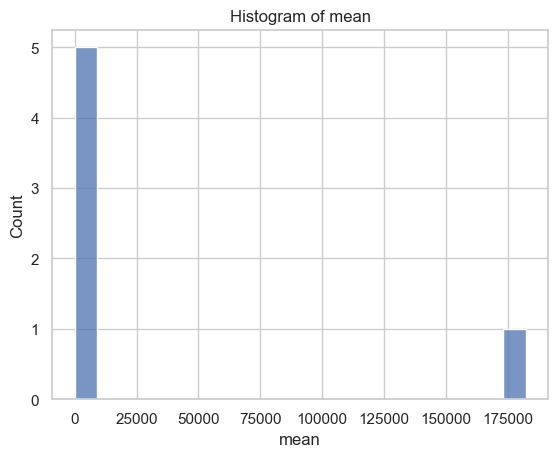

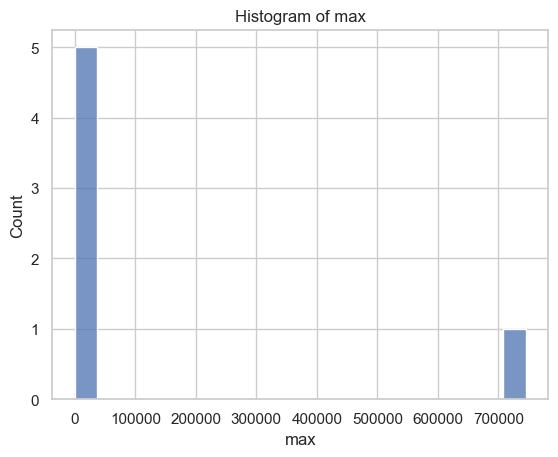

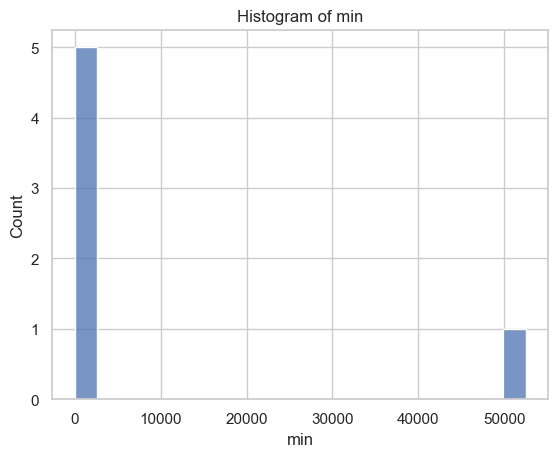

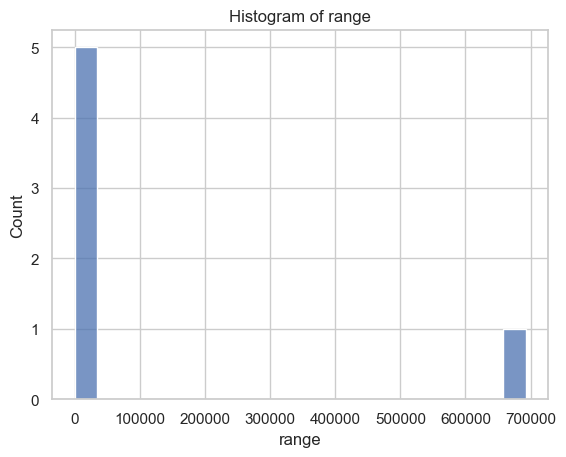

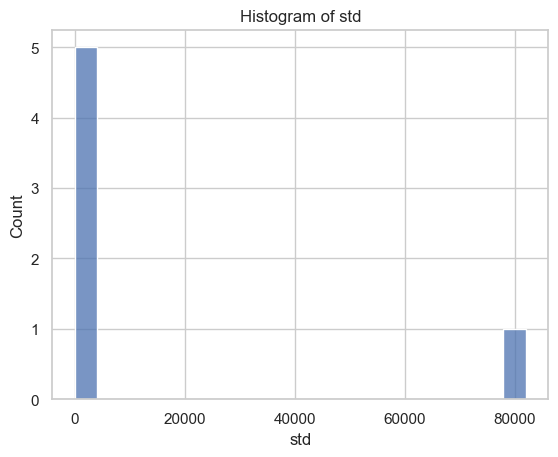

In [46]:
# distplot is deprecated: https://seaborn.pydata.org/generated/seaborn.distplot.html
# using histplot

sns.set(style='whitegrid')

for column in df_validation_and_test_statistics.columns:
    sns.histplot(df_validation_and_test_statistics[column].dropna(), kde=False, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()